# NEST Connection App

This notebook will show examples on how to use the NEST Connection App.

We start by importing `PointsSelector` and `NotebookGUI` from the App. The `PointsSelector` class will creates the plot and handles the selection of points. There are currently two types of user interfaces, one using PyQt5, and one using Notebook. But, as this is a notebook, we will use the latter.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from NESTConnectionApp.selector import PointsSelector
from NESTConnectionApp.GUI.guis import NotebookGUI

## Brunel example
The first example we will look at is the Brunel example. This system consists of one excitatory layer, one inhibitory layer, one input, spike detectors, and a voltmeter. The input is a Poisson generator and the nodes in the network are `iaf_psc_alpha` neurons.

The layer and model specifications are created with the `make_layers` function from the create_brunel example file. The specifications are sent to the `PointsSelector` class during initialization. Then the plots and buttons are created with the function `PointsSelector.select_in_layers()`, and we can start selecting connections. 

<IPython.core.display.Javascript object>


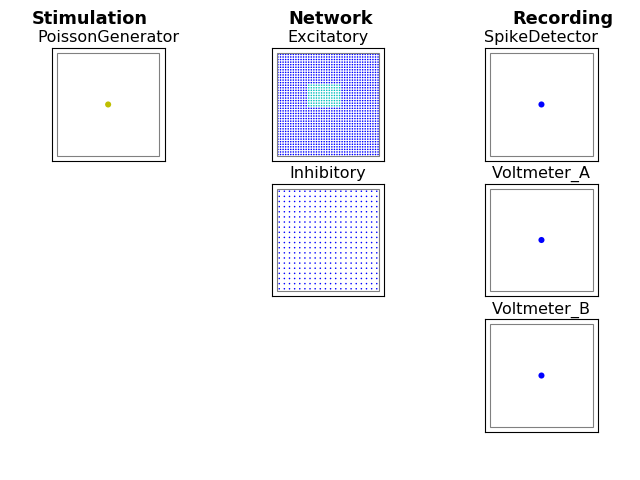

In [2]:
import define_brunel as brunel

nodesize = 2
layers, models, syn_models = brunel.make_layers()
no_layers = len(layers)

models += syn_models

connections = brunel.make_connections()

fig = plt.figure()
points_selector = PointsSelector(layers[:no_layers], models=models, syn_models=syn_models, nodesize=nodesize)
points_selector.run(fig=fig, interface=NotebookGUI)

When the selection has been made, they can be saved using the "save" button. Nest we get the selections from the `PointsSelector` class by calling `get_selections()`.

In [3]:
selections = points_selector.get_selections()
selections  # somewhat pretty printing

{'Excitatory': {'projection 1': [['rectangle',
    [-0.19083496093749996, -0.023417968750000018],
    [0.13057128906249993, 0.21033203124999966],
    'target',
    'all',
    'static_excitatory']],
  'projection 2': [],
  'projection 3': [],
  'projection 4': [],
  'projection 5': []},
 'Inhibitory': {'projection 1': [],
  'projection 2': [],
  'projection 3': [],
  'projection 4': [],
  'projection 5': []},
 'PoissonGenerator': {'projection 1': [['rectangle',
    [-0.17273079427083315, -0.10133463541666687],
    [0.18763378906250017, 0.093457031249999822],
    'source',
    'all',
    'static_excitatory']],
  'projection 2': [],
  'projection 3': [],
  'projection 4': [],
  'projection 5': []},
 'SpikeDetector': {'projection 1': [],
  'projection 2': [],
  'projection 3': [],
  'projection 4': [],
  'projection 5': []},
 'Voltmeter_A': {'projection 1': [],
  'projection 2': [],
  'projection 3': [],
  'projection 4': [],
  'projection 5': []},
 'Voltmeter_B': {'projection 1': [],
  'p

We are now ready to make the connections in NEST. The models for the system can be created in advance, or they can be created in the class where we make the connections. Here we will do the latter. 

The class handling the connection to NEST is `LayerSelectAndConnect`. At initialization it takes in the specifications of layers and models, like `PointsSelector`, and creates them in NEST. After initialization, we make the connections with the function `connect_layer`, sending in the selected connections we extracted earlier.

In [4]:
import nest
from NESTConnectionApp.nest_interface import NESTInterface

nest.ResetKernel()
# Creating models in LayerSelectAndConnect
nest_interface = NESTInterface(layers, models)
nest_interface.connect(selections, connections)

To connect: {} {}
Connecting..
Number of connections: 447029
To connect: {} {}
Connecting..
Number of connections: 447029
To connect: {'PoissonGenerator': (2,)} {'Excitatory': (504, 544, 584, 624, 664, 704, 744, 784, 824, 864, 904, 944, 984, 496, 497, 498, 499, 500, 501, 502, 503, 536, 537, 538, 539, 540, 541, 542, 543, 576, 577, 578, 579, 580, 581, 582, 583, 616, 617, 618, 619, 620, 621, 622, 623, 656, 657, 658, 659, 660, 661, 662, 663, 696, 697, 698, 699, 700, 701, 702, 703, 736, 737, 738, 739, 740, 741, 742, 743, 776, 777, 778, 779, 780, 781, 782, 783, 816, 817, 818, 819, 820, 821, 822, 823, 856, 857, 858, 859, 860, 861, 862, 863, 896, 897, 898, 899, 900, 901, 902, 903, 936, 937, 938, 939, 940, 941, 942, 943, 976, 977, 978, 979, 980, 981, 982, 983)}
Connecting..
PoissonGenerator and Excitatory
Number of connections: 447146
To connect: {} {}
Connecting..
Number of connections: 447146
To connect: {} {}
Connecting..
Number of connections: 447146


With connections made, we can simulate the system, and get plots of the spiketrain and membrane potentials. Note that while we have set `print_time` to `True`, it outputs only to the terminal.

In [5]:
nest_interface.simulate(20, make_plot=True, print_time=True)

## Hill-Tononi example
In the next example we will use the Hill-Tononi model. We now have one input layer, using customized retina nodes. The layers in the network are as specified in the paper by Hill and Tononi (Hill and Tononi, 2005).

As in the Brunel example we use `make_layers()`, but now with some additional parameters. Like before we send the specifications of layers and models to the `PointsSelector` class, and start the selection process with the function `select_in_layers()`.

In [7]:
import define_hill_tononi as ht

Np = 10   # Number of rows and columns in primary nodes
Ns = 10   # Number of rows and columns in secondary nodes

layers, models, syn_models = ht.make_layers()

nodesize = 10
no_layers = len(layers)

models += syn_models

connections = ht.make_connections()

fig = plt.figure()
points_selector = PointsSelector(layers[:no_layers], models=models, syn_models=syn_models, nodesize=nodesize)
points_selector.run(fig=fig, interface=NotebookGUI)

<IPython.core.display.Javascript object>

NESTError: NewModelNameExists in CopyModel_l_l_D: /Relay is the name of an existing model and cannot be re-used.

After selecting the areas we want to connect, we extract them and make the connections with the `LayerSelectAndConnect` class. Here, for demonstration, we choose to create the models in advance.

In [ ]:
selections = points_selector.get_selections()

nest.ResetKernel()

# Models are created in advance
for m in models:
    nest.CopyModel(m[0], m[1], m[2])

# Now we no longer have to send in the model specifications
nest_interface = NESTInterface(layers)
nest_interface.connect(selections, connections)

We can now run the simulation.

In [ ]:
nest_interface.simulate(10, make_plot=True, print_time=True)

## Randomly placed nodes
As a final example we look at a layer with randomly placed nodes. As in the Brunel and Hill-Tononi examples we create layer and model specifications and send them to the `PointsSelector` class, which plots the layers.

In [ ]:
import define_brunel_random as brunel_random

nest.ResetKernel()

layers, models, syn_models = brunel_random.make_layers()

nodesize = 10
no_layers = len(layers)

models += syn_models

connections = brunel_random.make_connections()

fig = plt.figure()
points_selector = PointsSelector(layers[:no_layers], models=models, syn_models=syn_models, nodesize=nodesize)
points_selector.run(fig=fig, interface=NotebookGUI)

Selecting randomly placed nodes is just as easy as nodes in a grid. Next we get the selections, make the connections and simulate the system.

In [ ]:
selections = points_selector.get_selections()
nest.ResetKernel()

nest_interface = NESTInterface(layers, models)
nest_interface.connect(selections, connections)
nest_interface.simulate(10, make_plot=True, print_time=True)

## References
(Hill and Tononi, 2005 ) Hill, S. and Tononi, G., 2005. Modeling sleep and wakefulness in the thalamocortical system. Journal of neurophysiology, 93(3), pp.1671-1698.